In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
# Checking dataframe columns and data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Checking data types of my DF 
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
# Checking column names

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
print('This dataframe has:',len(df.columns),'columns')

This dataframe has: 12 columns


In [7]:
print('This dataframe has:',df.shape[0],'rows and ',df.shape[1],'columns')

This dataframe has: 891 rows and  12 columns


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
''' Podemos ver que las columnas Age, Cabin y Embarked tienen datos nulos. Los próximos pasos serán determinar qué
    hacer con esos registros nulos, especialmente los de *Cabin* porque la mayoría son nulos'''

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Para el propósito de la competición, los nombres de los pasajeros y los tickets no son relevantes para el modelo. Por lo tanto podemos eliminar esas columnas

In [10]:
df.drop(['Name','Ticket'], axis = 1, inplace = True)

In [11]:
df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S


También se puede suponer que la columna **Embarked** no influye sobre el modelo final ya que solo indica donde se subieron los pasajeros. Pero por el momento se va a dejar.

La columna **Cabin** no influye sobre el modelo, podemos quitarla

In [12]:
df['Cabin'].value_counts()[1:10]

C23 C25 C27    4
B96 B98        4
F2             3
C22 C26        3
F33            3
D              3
E101           3
D20            2
B49            2
Name: Cabin, dtype: int64

In [13]:
print('Cantidad de cabinas:',len(df['Cabin'].value_counts()))

Cantidad de cabinas: 147


Además en la línea de arriba se ve que hay 147 cabinas, cada una 4 o menos ocupantes. No es relevante para el modelo saber donde estaban ubicados los pasajeros.

In [14]:
# Drop Cabin columns

df.drop('Cabin', axis = 1, inplace = True)

In [15]:
df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S


### Tratamiento de valores nulos ###

Ahora si, voy a empezar a tratar adecuadamente los valores nulos o NaN que se encuentran en el DataSet. Volvemos a revisar aquellas columnas en las cuales están

In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

Como vemos, al eliminar columnas en las instancias anteriores, fui quitando valores nulos, por lo que solamente quedan algunos en la columna *Age* y *Embarked*

**Nota**: El número de registros permanece igual porque todavía no eliminé ninguno, solo columnas

In [17]:
# Para los valores nulos de la columna 'Embarked', voy a eliminarlos, porque no hay forma de intuirlos o estimarlos
# Además, como sólo son 2 registros, no se pierde mucha información.

df.dropna(subset = ['Embarked'], inplace = True)

In [18]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [19]:
# Elimino los valores NaN de la columna 'Age' porque es un dato importante y no puedo estimarlo

df.dropna(subset = ['Age'], inplace = True)

In [20]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [21]:
print('This dataframe has:',df.shape[0],'rows and ',df.shape[1],'columns')

This dataframe has: 712 rows and  9 columns


C:\Users\emilo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


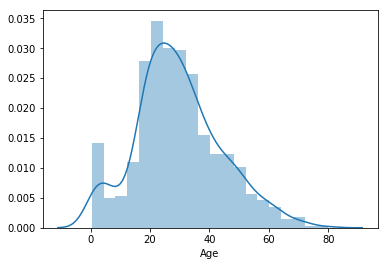

In [22]:
# Checking for 'weird' ages

sns.distplot(df.Age)

In [23]:
df.loc[(df.Age < 1) & (df.Age >  0)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
78,79,1,2,male,0.83,0,2,29.0000,S
305,306,1,1,male,0.92,1,2,151.5500,S
469,470,1,3,female,0.75,2,1,19.2583,C
644,645,1,3,female,0.75,2,1,19.2583,C
755,756,1,2,male,0.67,1,1,14.5000,S
803,804,1,3,male,0.42,0,1,8.5167,C
831,832,1,2,male,0.83,1,1,18.7500,S


In [24]:
# Redondeo estos valores

df['Age'] = round(df.Age)

In [25]:
df.loc[(df.Age < 1) & (df.Age >  0)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [26]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.029526,-0.035609,0.033692,-0.082704,-0.011672,0.009655
Survived,0.029526,1.000000,-0.356462,-0.082059,-0.015523,0.095265,0.266100
Pclass,-0.035609,-0.356462,1.000000,-0.366358,0.065187,0.023666,-0.552893
Age,0.033692,-0.082059,-0.366358,1.000000,-0.307109,-0.187822,0.093364
SibSp,-0.082704,-0.015523,0.065187,-0.307109,1.000000,0.383338,0.139860
Parch,-0.011672,0.095265,0.023666,-0.187822,0.383338,1.000000,0.206624
Fare,0.009655,0.266100,-0.552893,0.093364,0.139860,0.206624,1.000000


No pareciera haber ninguna relación directa entre las variables que ayude a intuir el tipo de modelo a aplicar

En esta parte quiero discretizar la columna *Age* para poder convertirlo en una variable categórica que facilite su manejo en el modelo.

In [27]:
df['Age_types']=pd.cut(df.Age,np.array([0,14,30,50,100]),labels=['Child','Adult','MidAge','Old'])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_types
0,1,0,3,male,22.0,1,0,7.2500,S,Adult
1,2,1,1,female,38.0,1,0,71.2833,C,MidAge
2,3,1,3,female,26.0,0,0,7.9250,S,Adult
3,4,1,1,female,35.0,1,0,53.1000,S,MidAge
4,5,0,3,male,35.0,0,0,8.0500,S,MidAge


In [28]:
# Creo un nuevo dataframe sin la columna 'Age'

df_filtered = df.drop('Age', axis = 1)

In [29]:
df_filtered.head(3)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_types
0,1,0,3,male,1,0,7.2500,S,Adult
1,2,1,1,female,1,0,71.2833,C,MidAge
2,3,1,3,female,0,0,7.9250,S,Adult


### Visualización de datos / Correlación de variables ###

En esta parte quiero ver la distribución de los distintos atributos del dataset. Además, quiero entender la correlación entre las distintas columnas, y cuál está más relacionada con mi variable *Target*

Text(0.5, 1.0, 'Class Distribution')

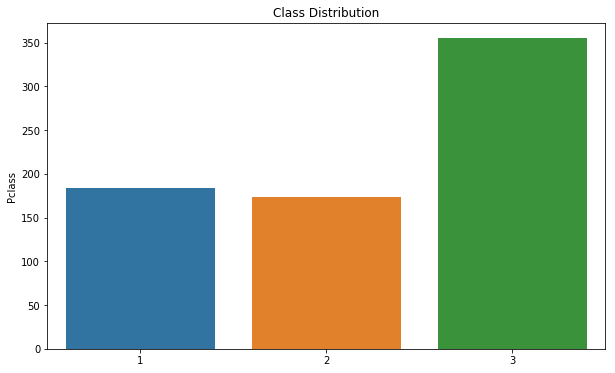

In [30]:
plt.figure(figsize = (10,6))

sns.barplot(x = df_filtered['Pclass'].unique(), y = df_filtered['Pclass'].value_counts()).set_title('Class Distribution')

Text(0.5, 1.0, 'Survived Distribution')

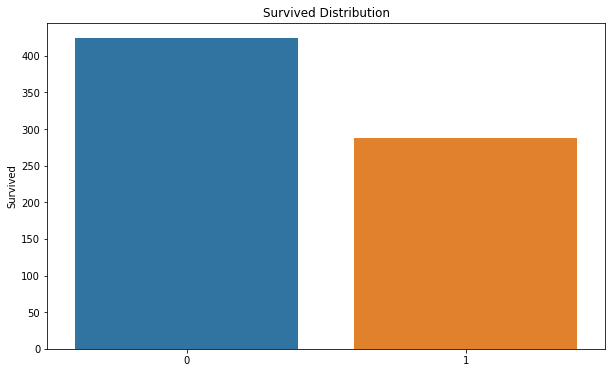

In [31]:
plt.figure(figsize = (10,6))

sns.barplot(x = df_filtered['Survived'].unique(), y = df_filtered['Survived'].value_counts()).set_title('Survived Distribution')

In [32]:
df_filtered['Age_types'].value_counts()

Adult     333
MidAge    238
Child      77
Old        63
Name: Age_types, dtype: int64

In [33]:
df_filtered.loc[df_filtered.Age_types.isna()]

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_types
803,804,1,3,male,0,1,8.5167,C,NaN


In [34]:
df.loc[df.PassengerId == 804]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_types
803,804,1,3,male,0.0,0,1,8.5167,C,NaN


In [35]:
df_filtered.dropna(inplace = True)

Text(0.5, 1.0, 'Age types')

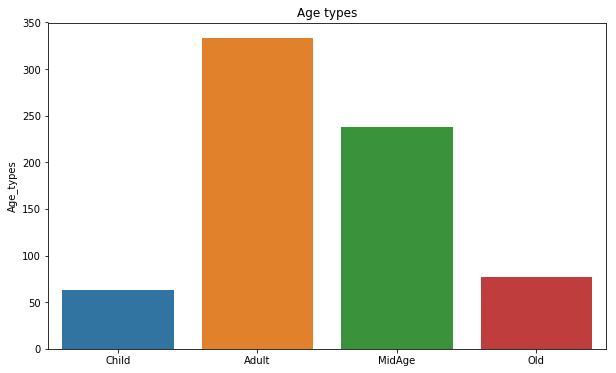

In [36]:
plt.figure(figsize = (10,6))
sns.barplot(x = df_filtered['Age_types'].unique(), y = df_filtered['Age_types'].value_counts()).set_title('Age types')
#sns.barplot(x = ['Adult','MidAge','Child','Old'], y = df_filtered['Age_types'].value_counts())

Text(0.5, 1.0, 'Sex')

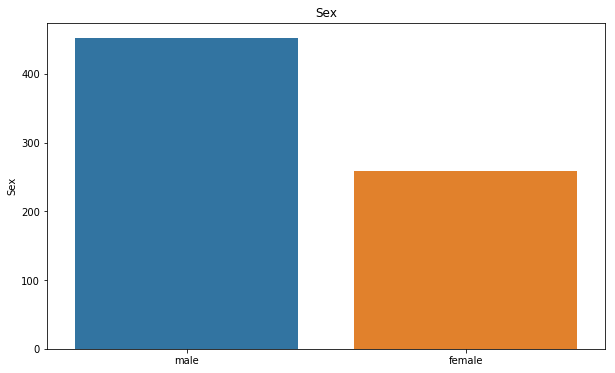

In [37]:
plt.figure(figsize = (10,6))
sns.barplot(x = df_filtered['Sex'].unique(), y = df_filtered['Sex'].value_counts()).set_title('Sex')

La información más útil puedo obtenerla si mezclo algunas variables para visualizar patrones. Por ejemplo, qué porcentaje de supervivientes eran mujeres, o niños, o adultos, etc.

In [38]:
df_filtered['Temporary']=0
df_filtered.Temporary.loc[df.Survived==0]='Dead'
df_filtered.Temporary.loc[df.Survived==1]='Alive'

C:\Users\emilo\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [39]:
df_filtered.head(3)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_types,Temporary
0,1,0,3,male,1,0,7.2500,S,Adult,Dead
1,2,1,1,female,1,0,71.2833,C,MidAge,Alive
2,3,1,3,female,0,0,7.9250,S,Adult,Alive


In [40]:
# Ahora creo una Crosstab entre Sex, Survived y Class para ver las proporciones de c/u

crosstab_3=pd.crosstab([df_filtered.Sex,df_filtered.Temporary],df_filtered.Pclass)
crosstab_3

Pclass             1   2    3
Sex    Temporary             
female Alive      80  68   47
       Dead        3   6   55
male   Alive      40  15   37
       Dead       61  84  215

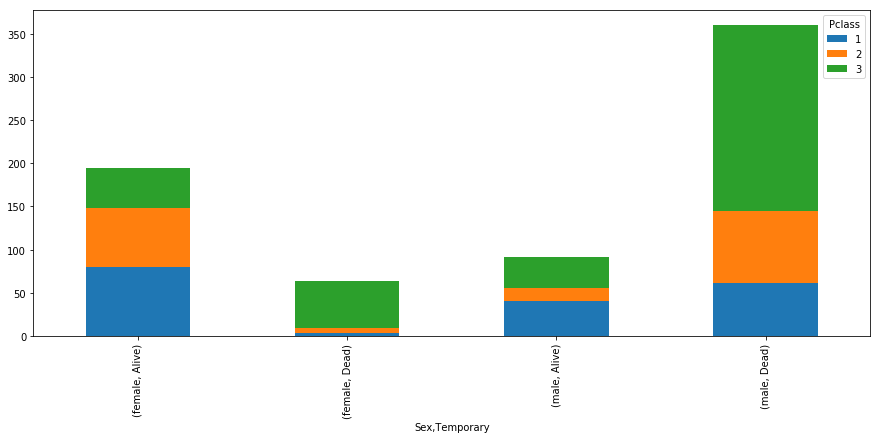

In [41]:
# Stacked bar distribution
crosstab_3.plot.bar(stacked = True, figsize = (15,6))

In [42]:
crosstab_2=pd.crosstab(df_filtered.Sex,df_filtered.Temporary)
crosstab_2

Temporary,Alive,Dead
Sex,,
female,195,64
male,92,360


In [43]:
print('Percentage of dead Female:',round((len(df_filtered.loc[(df_filtered.Sex == 'female') & (df_filtered.Survived == 0)])/len(df_filtered['Sex']))*100),'%')
print('Percentage of dead Male:',round((len(df_filtered.loc[(df_filtered.Sex == 'male') & (df_filtered.Survived == 0)])/len(df_filtered['Sex']))*100),'%')

print('Dead people that were female:',round((len(df_filtered.loc[(df_filtered.Sex == 'female') & (df_filtered.Survived == 0)])/len(df_filtered.loc[df_filtered['Survived'] == 0]))*100),'%')
print('Dead people that were male:',round((len(df_filtered.loc[(df_filtered.Sex == 'male') & (df_filtered.Survived == 0)])/len(df_filtered.loc[df_filtered['Survived'] == 0]))*100),'%')



Percentage of dead Female: 9 %
Percentage of dead Male: 51 %
Dead people that were female: 15 %
Dead people that were male: 85 %


**Primeras conclusiones**

    - Murieron muchos más hombres que mujeres (del total de la población a bordo, fallecieron más de la mitad, de los cuáles,  el 85% eran hombres)
    - En ambos casos (mujeres y hombres) la clase que tuvo más fallecidos fue la clase 3
    - Sobrevivieron más mujeres de la clase 1 y 2 que de la clase 3, y en el caso de los hombres, sobrevivieron más hombres de la clase 1 y 3

Miremos ahora, dentro de los fallecidos y los vivos, la distribución de edades. Con el análisis anterior, pareciera haber una tendencia que indica que tenían más chances de sobrevivir las mujeres

Primero codifico las variables categóricas de *Age Types*, porque quiero ver si tiene algún tipo de relación directa con *Survived*

In [44]:
import sklearn
from sklearn import preprocessing 

In [45]:
le = preprocessing.LabelEncoder()

In [46]:
df_filtered['Age_types'] = le.fit_transform(df_filtered['Age_types'])

In [47]:
le.classes_

array(['Adult', 'Child', 'MidAge', 'Old'], dtype=object)

In [48]:
df_filtered.corr()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Age_types
PassengerId,1.000000,0.027244,-0.037438,-0.081761,-0.012979,0.010624,0.038810
Survived,0.027244,1.000000,-0.358592,-0.014598,0.094258,0.267262,0.025298
Pclass,-0.037438,-0.358592,1.000000,0.065946,0.022837,-0.552679,-0.315072
SibSp,-0.081761,-0.014598,0.065946,1.000000,0.384056,0.139531,-0.016814
Parch,-0.012979,0.094258,0.022837,0.384056,1.000000,0.207184,0.053036
Fare,0.010624,0.267262,-0.552679,0.139531,0.207184,1.000000,0.123166
Age_types,0.038810,0.025298,-0.315072,-0.016814,0.053036,0.123166,1.000000


No encuentro relación directa, pero no importa, observemos los gráficos y hagamos un crosstab entre los sobrevivientes y los tipos de edades

In [49]:
# Vuelvo a colocar los Age Types como estaban antes
df_filtered['Age_types'] = le.inverse_transform(df_filtered['Age_types'])

In [50]:
# Creo el crosstab

crosstab_2=pd.crosstab(df_filtered.Age_types,df_filtered.Temporary)
crosstab_2

Temporary,Alive,Dead
Age_types,,
Adult,121,212
Child,44,33
MidAge,101,137
Old,21,42


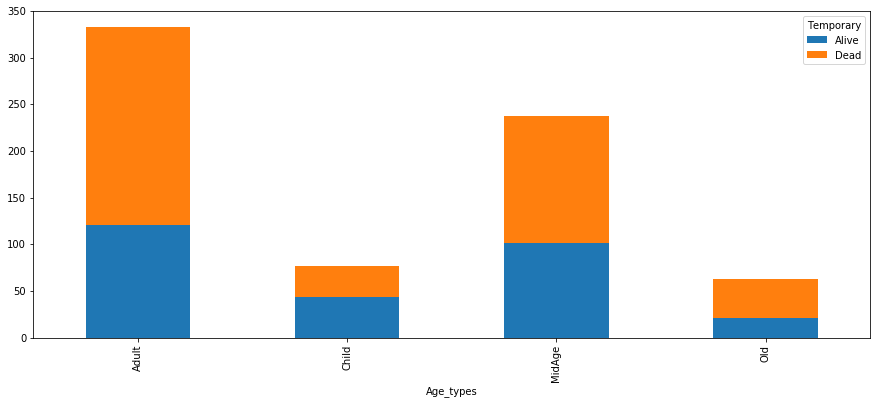

In [51]:
crosstab_2.plot.bar(stacked = True, figsize = (15,6))

In [52]:
round((df_filtered['Age_types'].value_counts()/len(df_filtered['Age_types']))*100)

Adult     47.0
MidAge    33.0
Child     11.0
Old        9.0
Name: Age_types, dtype: float64

In [53]:
# Porcentaje de muertos por cada edad, con respecto al total de pasajeros
for age in df_filtered.Age_types.unique():
    print(age,'dead',round((len(df_filtered.loc[(df_filtered.Age_types == age) & (df_filtered.Survived == 0)])/len(df_filtered.Age_types))*100,4),'%')

Adult dead 29.8172 %
MidAge dead 19.2686 %
Old dead 5.9072 %
Child dead 4.6414 %


In [54]:
# Porcentaje de muertos por cada edad, con respecto al total de cada edad
for age in df_filtered.Age_types.unique():
    print(age,'dead',round((len(df_filtered.loc[(df_filtered.Age_types == age) & (df_filtered.Survived == 0)])/len(df_filtered.loc[df_filtered.Age_types == age]))*100,4),'%')

Adult dead 63.6637 %
MidAge dead 57.563 %
Old dead 66.6667 %
Child dead 42.8571 %


Con los análisis anteriores vemos:

    - En la población de la tripulación, cerca del 50% son adultos, y la minoría son gente mayor
    - En porcentaje, la mayoría de los muertos fueron adultos y midage, lo que lleva a pensar que los que más chances tenían de sobrevivir son los niños y adultos mayores
    - A pesar de la conclusión anterior, podemos excluir a los adultos mayores como más probables de sobrevivir, ya que en el último análisis, vemos que, de los adultos mayores en el barco, el 67% de estos falleció. 
    - En base a lo dicho anteriormente, los chicos tenían más chances de sobrevivir

Si a este análisis le agregamos la variable de mujeres y hombres, deberíamos tener un panorama más claro y más abierto de los grupos que fallecieron y los que sobrevivieron

In [55]:
crosstab_1=pd.crosstab([df_filtered.Age_types,df_filtered.Sex],df_filtered.Temporary)
crosstab_1

Temporary         Alive  Dead
Age_types Sex                
Adult     female     90    30
          male       31   182
Child     female     24    15
          male       20    18
MidAge    female     66    18
          male       35   119
Old       female     15     1
          male        6    41

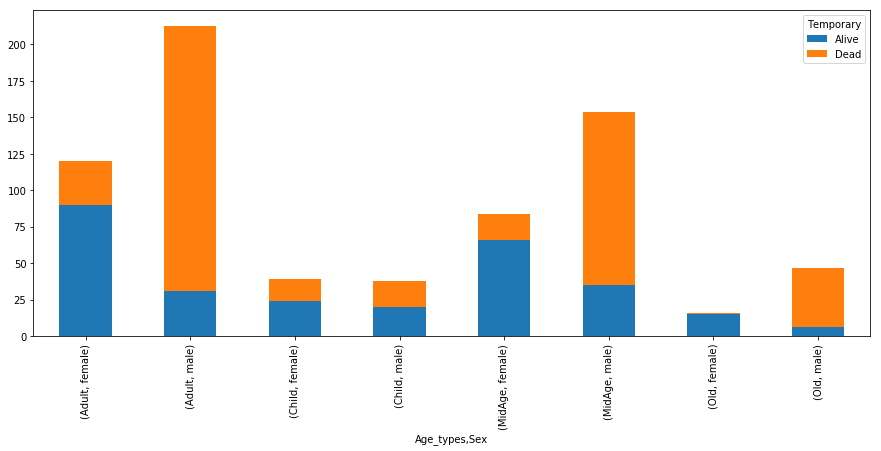

In [56]:
crosstab_1.plot.bar(stacked = True, figsize = (15,6))

Sacamos dos conclusiones:

1) Este gráfico confirma la suposición de que las mujeres tenían más chances de sobrevivir que los hombres

2) El único gráfico donde no se observa diferencia entre mujeres y hombres son con los niños

In [57]:
df_class1 = df_filtered.loc[df_filtered.Pclass == 1]
df_class2 = df_filtered.loc[df_filtered.Pclass == 2]
df_class3 = df_filtered.loc[df_filtered.Pclass == 3]

In [58]:
crosstab_cls1=pd.crosstab([df_class1.Age_types,df_class1.Sex],df_class1.Temporary)
crosstab_cls2=pd.crosstab([df_class2.Age_types,df_class2.Sex],df_class2.Temporary)
crosstab_cls3=pd.crosstab([df_class3.Age_types,df_class3.Sex],df_class3.Temporary)

Text(0.5, 1.0, 'Class 1')

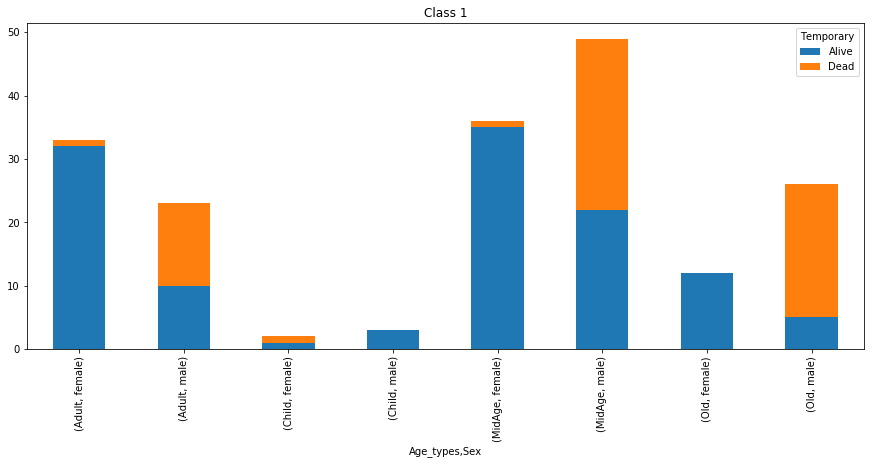

In [59]:
crosstab_cls1.plot.bar(stacked = True, figsize = (15,6)).set_title('Class 1')

Text(0.5, 1.0, 'Class 2')

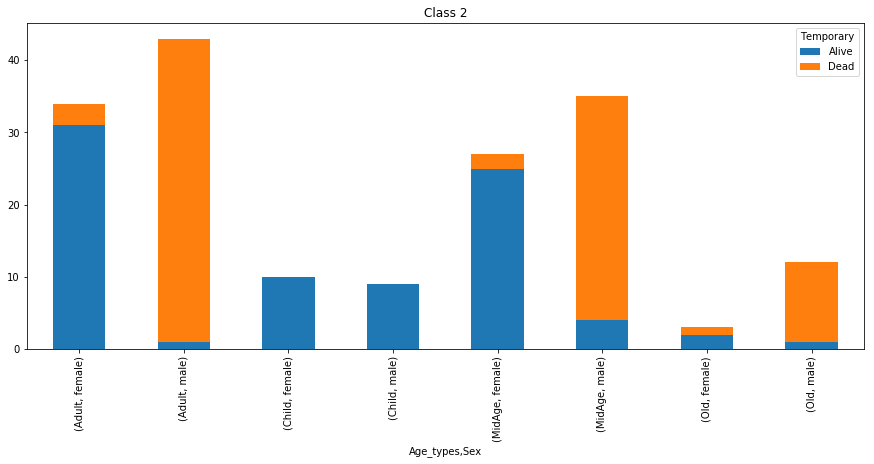

In [60]:
crosstab_cls2.plot.bar(stacked = True, figsize = (15,6)).set_title('Class 2')

Text(0.5, 1.0, 'Class 3')

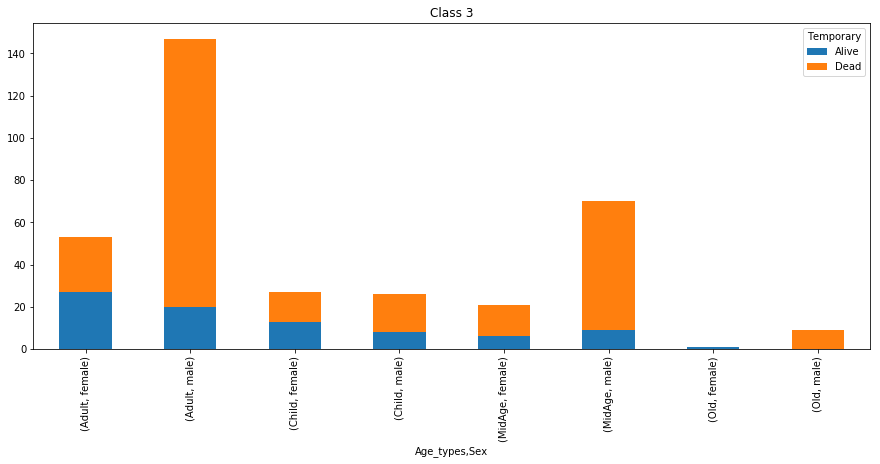

In [61]:
crosstab_cls3.plot.bar(stacked = True, figsize = (15,6)).set_title('Class 3')

**Conclusion**

La clase 1 tiene la mayor cantidad de sobrevivientes, tanto mujeres como hombres, en relación a las otras dos. Pero, viendo más detenidamente, podemos decir que tanto en la clase 1 como en la 2 las mujeres tenían más chances de sobrevivir (ejemplo, en la clase 1, casi todas las mujeres, de cualquier rango de edad, sobrevivian).

Además, se ve más claramente, que los niños (mujeres u hombres) tenian mas chances de sobrevivir.

Por último, aunque cruel, vemos que el porcentaje de sobrevivientes, homrbes o mujeres, en la clase más baja, baja en tanto que el de muertos aumenta mucho.

### Cleaning Outliers ###

Para este dataset, no voy a realizar limpieza de datos porque son todos valores categóricos, por lo que no voy a encontrar valores fuera de lo ordinario. Podría encontrar valores extraños en la tarifa pagada por el viaje, pero no es relevante para el modelo.

### Elaborando el modelo ###

Para el modelo predictivo voy a probar varios distintos:

    - Lineal Regression
    - Decission Tree
    - Random Forest
    - KNN
    - Buscar modelos alternativos no utilizados por mi todavia

In [62]:
df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_types
0,1,0,3,male,22.0,1,0,7.2500,S,Adult
1,2,1,1,female,38.0,1,0,71.2833,C,MidAge
2,3,1,3,female,26.0,0,0,7.9250,S,Adult


Voy a utilizar el dataframe original, para ver qué resultado me da el modelo si no coloco la columna Age_types

In [63]:
le_2 = preprocessing.LabelEncoder()
le_3 = preprocessing.LabelEncoder()
df_copy = df
df['Sex'] = le_2.fit_transform(df['Sex'])


In [64]:
df['Age_types'] = le.fit_transform(df['Age_types'].astype(str)) # El label encoder para la columna me arrojaba error, tuve que convertirlo en str
df['Age_types'] = le_3.fit_transform(df['Age_types'])

In [65]:
le_3.classes_

array([0, 1, 2, 3, 4])

In [66]:
df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_types
0,1,0,3,1,22.0,1,0,7.2500,S,0
1,2,1,1,0,38.0,1,0,71.2833,C,2
2,3,1,3,0,26.0,0,0,7.9250,S,0


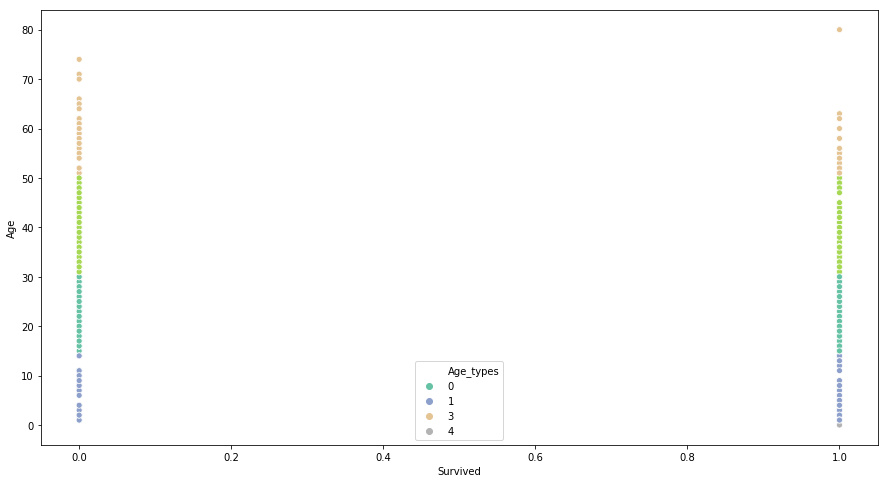

In [67]:
plt.figure(figsize = (15,8))
sns.scatterplot(df['Survived'],df['Age'],hue = df['Age_types'], palette = 'Set2')

In [68]:
Survived = []
Died = []
Survived = df['Age'].loc[df.Survived == 1]
Died = df['Age'].loc[df.Survived == 0]
#scatter['Died'] = df['Age'].loc[df.Survived == 0]

C:\Users\emilo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


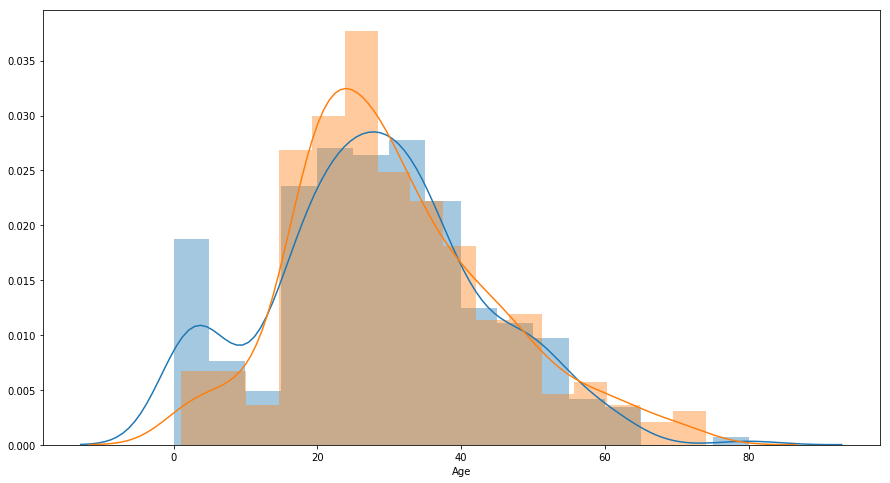

In [69]:
plt.figure(figsize = (15,8))
sns.distplot(Survived, label = 'Survived')
sns.distplot(Died, label = 'Died')

Lo que quise hacer con los dos últimos gráficos fue intentar encontrar alguna variable que me separara notoriamente los pasajeros entre los que sobrevivieron y los que no. El principal parámetro que se me ocurrió fueron las edades, pero como se ve, no hay claridad en que este sea el factor clave, más allá de las conclusiones obtenidas con anterioridad. Tal vez, si abriera más los rangos de edades y los separara por sexo obtendría una noción más clara, pero no más análisis. PASEMOS AL MODELADO!!

Revisamos nuevamente el DataSet

In [70]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_types
0,1,0,3,1,22.0,1,0,7.2500,S,0
1,2,1,1,0,38.0,1,0,71.2833,C,2
2,3,1,3,0,26.0,0,0,7.9250,S,0
3,4,1,1,0,35.0,1,0,53.1000,S,2
4,5,0,3,1,35.0,0,0,8.0500,S,2


Para el conjunto de *Training* eliminaré las columnas de *Fare* y *Age*, ya que la discreticé en la columna *Age_types*. Pero, tanto esta como la columna *Pclass* y *Embarked* poseen múltiples clases, por lo cuál puedo correr el riesgo de que el modelo pese diferente según la clase. Por el momento, las dejo así y veo que resultados arrojan los modelos.

In [71]:
le_4 = preprocessing.LabelEncoder()

df['Embarked'] = le_4.fit_transform(df['Embarked'])


In [72]:
X = df.drop(['Survived','Fare','Age'],axis = 1)
y = df['Survived']

In [73]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [74]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

SVC = LinearSVC()
param_grid = [{'C':[0.001, 0.01, 0.1, 1, 10, 15, 20, 30],'loss':['hinge', 'squared_hinge']}]
grid_search = GridSearchCV(SVC, param_grid, cv = 5, scoring = 'roc_auc', return_train_score = True)

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 15, 20, 30], 'loss': ['hinge', 'squared_hinge']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

### Mean Train Scores

In [75]:
for i in range(5):
    print('Split ',i,'train score:',grid_search.cv_results_['mean_train_score'][i])

Split  0 train score: 0.7775165720736349
Split  1 train score: 0.7875931911196228
Split  2 train score: 0.7394519629118478
Split  3 train score: 0.7156531698759314
Split  4 train score: 0.759767582722494


In [76]:
grid_search.best_params_

{'C': 15, 'loss': 'hinge'}

In [77]:
optimised_svm = grid_search.best_estimator_

In [78]:
# Mostrá la matriz de confusión en esta celda
from sklearn.metrics import confusion_matrix

y_pred = optimised_svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
classes = ['Alive','Dead']

In [79]:
cm

array([[67, 21],
       [ 9, 46]], dtype=int64)

In [80]:
from sklearn.metrics import roc_auc_score

print('ROC AUC SCORE:',roc_auc_score(y_test,y_pred))

ROC AUC SCORE: 0.7988636363636363


**Conclusión**: La curva de ROC me da relativamente baja. Si observamos más arriba veremos que no coloqué las variables categóricas en columnas, por lo que el modelo puede estar dándole más importancia a algunas variables que a otras. Voy a convertirlas en variables Dummies y ver si obtengo un nuevo resultado

In [81]:
df['Sex'] = le_2.inverse_transform(df['Sex'])
df['Age_types'] = le_3.inverse_transform(df['Age_types'])
df['Embarked'] = le_4.inverse_transform(df['Embarked'])

In [82]:
# Genero un nuevo dataset con las variables dummies y con variables continuas 
df_dummie = pd.get_dummies(df)


In [83]:
df_dummie.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_types,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,2,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,2,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,2,0,1,0,0,1


In [84]:
df_filtered.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_types,Temporary
0,1,0,3,male,1,0,7.2500,S,Adult,Dead
1,2,1,1,female,1,0,71.2833,C,MidAge,Alive
2,3,1,3,female,0,0,7.9250,S,Adult,Alive
3,4,1,1,female,1,0,53.1000,S,MidAge,Alive
4,5,0,3,male,0,0,8.0500,S,MidAge,Dead


In [85]:
# Creo una variable categórica para la columna Pclass
df_filtered['Temporary_class']=0
df_filtered['Temporary_class'].loc[df.Pclass==1]='High'
df_filtered['Temporary_class'].loc[df.Pclass==2]='Medium'
df_filtered['Temporary_class'].loc[df.Pclass==3]='Low'

In [86]:
df_filtered.tail()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_types,Temporary,Temporary_class
885,886,0,3,female,0,5,29.125,Q,MidAge,Dead,Low
886,887,0,2,male,0,0,13.000,S,Adult,Dead,Medium
887,888,1,1,female,0,0,30.000,S,Adult,Alive,High
889,890,1,1,male,0,0,30.000,C,Adult,Alive,High
890,891,0,3,male,0,0,7.750,Q,MidAge,Dead,Low


In [87]:
df_filtered.drop(['Pclass','PassengerId','Temporary'],axis = 1,inplace = True)

In [88]:
df_filtered.head()

,Survived,Sex,SibSp,Parch,Fare,Embarked,Age_types,Temporary_class
0,0,male,1,0,7.2500,S,Adult,Low
1,1,female,1,0,71.2833,C,MidAge,High
2,1,female,0,0,7.9250,S,Adult,Low
3,1,female,1,0,53.1000,S,MidAge,High
4,0,male,0,0,8.0500,S,MidAge,Low


In [89]:
df_dummie = pd.get_dummies(df_filtered)

In [90]:
df_dummie.head()

,Survived,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_types_Adult,Age_types_Child,Age_types_MidAge,Age_types_Old,Temporary_class_High,Temporary_class_Low,Temporary_class_Medium
0,0,1,0,7.2500,0,1,0,0,1,1,0,0,0,0,1,0
1,1,1,0,71.2833,1,0,1,0,0,0,0,1,0,1,0,0
2,1,0,0,7.9250,1,0,0,0,1,1,0,0,0,0,1,0
3,1,1,0,53.1000,1,0,0,0,1,0,0,1,0,1,0,0
4,0,0,0,8.0500,0,1,0,0,1,0,0,1,0,0,1,0


In [91]:
X = df_dummie.drop(['Survived','Fare'],axis = 1)
y = df_dummie['Survived']

In [92]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [93]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

SVC = LinearSVC()
param_grid = [{'C':[0.001, 0.01, 0.1, 1, 10, 15, 20, 30],'loss':['hinge', 'squared_hinge']}]
grid_search = GridSearchCV(SVC, param_grid, cv = 5, scoring = 'roc_auc', return_train_score = True)

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 15, 20, 30], 'loss': ['hinge', 'squared_hinge']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

### Mean Train Scores

In [94]:
for i in range(5):
    print('Split ',i,'train score:',grid_search.cv_results_['mean_train_score'][i])

Split  0 train score: 0.8482363085532217
Split  1 train score: 0.8570964111260804
Split  2 train score: 0.8597490578584616
Split  3 train score: 0.8673922548599308
Split  4 train score: 0.8537148120999051


In [95]:
grid_search.best_params_

{'C': 0.01, 'loss': 'squared_hinge'}

In [96]:
optimised_svm = grid_search.best_estimator_

In [97]:
# Mostrá la matriz de confusión en esta celda
from sklearn.metrics import confusion_matrix

y_pred = optimised_svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
classes = ['Alive','Dead']

In [98]:
cm

array([[75, 10],
       [24, 34]], dtype=int64)

Confusion matrix, without normalization
[[75 10]
 [24 34]]


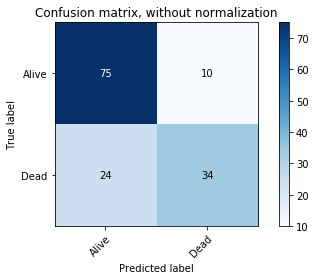

In [99]:
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

plot_confusion_matrix(y_test,y_pred,classes)

In [100]:
from sklearn.metrics import roc_auc_score

print('ROC AUC SCORE:',roc_auc_score(y_test,y_pred))

ROC AUC SCORE: 0.7342799188640974


# Probando datos nuevos

Obtuve un modelo que predice satisfactoriamente si un pasajero iba a morir o no en base a la base de datos de training que ya me indicaba la respuesta. Ahora, es momento de probar arrojarle a este modelo nuevos datos y ver que obtenemos, esta será la prueba final para determinar si mi modelo está listo para producción

Importo el nuevo DataSet

In [101]:
df_testing = pd.read_csv('test.csv')

In [102]:
df_testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Como podemos ver, este DataSet contiene las mimsas columnas que el de training, con la diferencia que no nos indica si el pasajero sobrevivió o no. Esta información la voy a guardar en un nuevo DataFrame *gender*

In [103]:
gender = pd.read_csv('gender_submission.csv')

In [104]:
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [105]:
df_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Elimino las columnas que no me sirven para el modelo: *Name*, *Ticket* y *Cabin*

In [106]:
df_testing.drop(['Name','Ticket'], axis = 1, inplace = True)

In [107]:
df_testing.drop(['Cabin'], axis = 1, inplace = True)

In [108]:
# Quiero chequear que no haya nombres raros en las variables categóricas
df_testing.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [109]:

columns = ['Pclass','Sex','Embarked']

for name in columns:
    print(df_testing[name].value_counts())
    print('\n')

3    218
1    107
2     93
Name: Pclass, dtype: int64


male      266
female    152
Name: Sex, dtype: int64


S    270
C    102
Q     46
Name: Embarked, dtype: int64




In [110]:
df_testing.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [111]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
df_testing['Age'] = imputer.fit_transform(df_testing[['Age']])
df_testing['Fare'] = imputer.fit_transform(df_testing[['Fare']])

In [112]:
df_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [113]:
# Redondeo los valores de Age porque veo que el mínimo es un valor menor a uno

df_testing['Age'] = round(df_testing.Age)

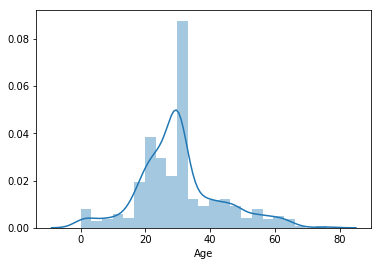

In [114]:
sns.distplot(df_testing.Age)

In [115]:
# Discretizo Age

df_testing['Age_types']=pd.cut(df_testing.Age,np.array([0,14,30,50,100]),labels=['Child','Adult','MidAge','Old'])
df_testing.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_types
0,892,3,male,34.0,0,0,7.8292,Q,MidAge
1,893,3,female,47.0,1,0,7.0000,S,MidAge
2,894,2,male,62.0,0,0,9.6875,Q,Old
3,895,3,male,27.0,0,0,8.6625,S,Adult
4,896,3,female,22.0,1,1,12.2875,S,Adult


In [116]:
# Creo una variable categórica para la columna Pclass
df_testing['Temporary_class']=0
df_testing['Temporary_class'].loc[df_testing.Pclass==1]='High'
df_testing['Temporary_class'].loc[df_testing.Pclass==2]='Medium'
df_testing['Temporary_class'].loc[df_testing.Pclass==3]='Low'

In [117]:
df_testing.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_types,Temporary_class
0,892,3,male,34.0,0,0,7.8292,Q,MidAge,Low
1,893,3,female,47.0,1,0,7.0000,S,MidAge,Low
2,894,2,male,62.0,0,0,9.6875,Q,Old,Medium
3,895,3,male,27.0,0,0,8.6625,S,Adult,Low
4,896,3,female,22.0,1,1,12.2875,S,Adult,Low


In [118]:
df_testing.drop(['Pclass','Age'], axis = 1, inplace = True)

In [119]:
df_testing.head()

,PassengerId,Sex,SibSp,Parch,Fare,Embarked,Age_types,Temporary_class
0,892,male,0,0,7.8292,Q,MidAge,Low
1,893,female,1,0,7.0000,S,MidAge,Low
2,894,male,0,0,9.6875,Q,Old,Medium
3,895,male,0,0,8.6625,S,Adult,Low
4,896,female,1,1,12.2875,S,Adult,Low


In [120]:
df_testing_dummie = pd.get_dummies(df_testing)

In [121]:
df_testing_dummie.head()

,PassengerId,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_types_Child,Age_types_Adult,Age_types_MidAge,Age_types_Old,Temporary_class_High,Temporary_class_Low,Temporary_class_Medium
0,892,0,0,7.8292,0,1,0,1,0,0,0,1,0,0,1,0
1,893,1,0,7.0000,1,0,0,0,1,0,0,1,0,0,1,0
2,894,0,0,9.6875,0,1,0,1,0,0,0,0,1,0,0,1
3,895,0,0,8.6625,0,1,0,0,1,0,1,0,0,0,1,0
4,896,1,1,12.2875,1,0,0,0,1,0,1,0,0,0,1,0


# Probando el modelo #

In [122]:
X = df_testing_dummie.drop(['PassengerId','Fare'],axis = 1)

In [123]:
df_testing['y_predicted'] = optimised_svm.predict(X)

In [124]:
df_testing.head()

,PassengerId,Sex,SibSp,Parch,Fare,Embarked,Age_types,Temporary_class,y_predicted
0,892,male,0,0,7.8292,Q,MidAge,Low,0
1,893,female,1,0,7.0000,S,MidAge,Low,1
2,894,male,0,0,9.6875,Q,Old,Medium,0
3,895,male,0,0,8.6625,S,Adult,Low,0
4,896,female,1,1,12.2875,S,Adult,Low,1


In [130]:
df_testing = df_testing.join(gender.set_index('PassengerId'), on = 'PassengerId')

In [131]:
df_testing.head()

,PassengerId,Sex,SibSp,Parch,Fare,Embarked,Age_types,Temporary_class,y_predicted,Survived
0,892,male,0,0,7.8292,Q,MidAge,Low,0,0
1,893,female,1,0,7.0000,S,MidAge,Low,1,1
2,894,male,0,0,9.6875,Q,Old,Medium,0,0
3,895,male,0,0,8.6625,S,Adult,Low,0,0
4,896,female,1,1,12.2875,S,Adult,Low,1,1


Confusion matrix, without normalization
[[248  18]
 [  3 149]]


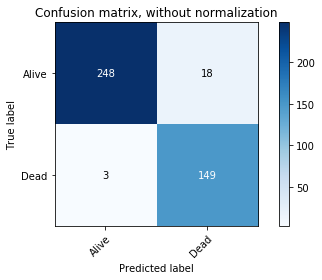

In [132]:
plot_confusion_matrix(df_testing['Survived'],df_testing['y_predicted'],classes)